# BAYES-LOSVD Notebook

This is a simple jupyter notebook that will guide you through the usage of the code.  

It consists on a number of steps:

- **Step 1:** Compile codes
- **Step 2:** Preprocess data  
- **Step 3:** Run code
- **Step 4:** Inspect results
- **Step 5:** Loading results into dictionary
- (Optional) **Step 6:** Run a GH fit to output LOSVD
- (Optional) **Step 7:** Inspect GH fit results
- (Optional) **Step 8:** Loading results into dictionary
  

In [2]:
%%html
<style>
table {float:left}
</style>

## STEP 1: Compile Stan codes

- This code will compile all the necessary Stan codes used in bayes-losvd_run.py.
- Should you create your own model, please run this routine again. 
- It will automatically detect the new Stan code and it will compile it.

In [3]:
run bayes_losvd_compile_codes.py

               BAYES-LOSVD                 
             (compile codes)               



[ RUNNING ] stan_model/bayes-losvd_model_GH_full_series.stan

Using cached StanModel


[ DONE ] stan_model/bayes-losvd_model_GH_full_series.stan compiled.



[ RUNNING ] stan_model/bayes-losvd_model_Bsplines.stan

Using cached StanModel


[ DONE ] stan_model/bayes-losvd_model_Bsplines.stan compiled.



[ RUNNING ] stan_model/bayes-losvd_ghfit.stan

Using cached StanModel


[ DONE ] stan_model/bayes-losvd_ghfit.stan compiled.



[ RUNNING ] stan_model/bayes-losvd_model_SP.stan

Using cached StanModel


[ DONE ] stan_model/bayes-losvd_model_SP.stan compiled.



[ RUNNING ] stan_model/bayes-losvd_model_RW.stan

Using cached StanModel


[ DONE ] stan_model/bayes-losvd_model_RW.stan compiled.



[ RUNNING ] stan_model/bayes-losvd_model_AR.stan

Using cached StanModel


[ DONE ] stan_model/bayes-losvd_model_AR.stan compiled.



## STEP 2: Preprocess data

| Flag | Alt. flag      | Description                  | Options and default values |
|------|----------------|------------------------------|----------------------------|
| -c   | --config       | path to preproc configuration file | ../config_files/example_preproc.properties      |


In [4]:
run bayes_losvd_preproc_data.py -c ../config_files/example_preproc.properties

               BAYES-LOSVD                 
             (preproc_data)                



[ RUNNING ] NGC7742_MUSE

--------------------------------------------
- Input run name:   NGC7742_MUSE
- Survey:           MUSE-WFM
- Wavelength range: 8475.0-8700.0
- Target SNR:       350.0
- Min SNR:          20.0
- Redshift:         0.00555
- Velscale:         15.0
- LOSVD Vmax:       300.0
- Mask file:        emission_lines.mask
- Pol. order:       5
- Templates:        EMILES_SSP
- Number of PCA:    5
--------------------------------------------

# Processing data .....
 - Reading the data and basic info
 - Correcting data for redshift
 - Cutting data to desired wavelength range
 - Computing the SNR of each spaxel
 - Selecting spaxels aboove SNR_min
 - Computing the Voronoi binning
   - 217 Voronoi bins created
   - Applying the Voronoi binning


 - Log-rebinning and normalizing the spectra


 - Defining the data mask
 - Storing everything in data structure

# Processing templates .....
 - 424 templates found in EMILES_SSP library
 - Loading and preparing the templates...


 - Running PCA on the templates...
    5 PCA components explain  99.981% of the variance in the input library
 - Convolving the templates to match the data's LSF


[ WARNING ] Some values of the data LSF are below the templates values



 - Log-rebinning the templates
 - Resampling the templates to match the wavelength of the observed data (if needed)
 - Storing everything in templates structure

# Creating the LOSVD velocity vector .....

# Padding the templates for convolution .....

# Saving preproc data: ../preproc_data/NGC7742_MUSE.hdf5

# Plotting some basic info in ../preproc_data/NGC7742_MUSE.pdf


[ DONE ] NGC7742_MUSE



## STEP 3: Run code

**NOTE: This step can take a while depending on the number of spectra and pixels to be fitted, the S/N ratio, and number of chains and iterations. This example should take about 5min to run.**

| Flag | Alt. flag       | Description                                  | Options and default values |
|------|-----------------|----------------------------------------------|----------------------------|
| -f   | --preproc_file  | path to preproc preproc file                 | No default                 |
| -i   | --niter         | number of iterationsto run in Stan           |    500       |
| -c   | --nchain        | number of simultaneous chains to run in Stan |  1      |    
| -b   | --bin           | bin IDs for spectra run                      |  all/odd/even/bin_list (comma separated bin list)      |    
| -m   | --mask_bin      | bin IDs to ignore from bin list              |  None      |    
| -t   | --fit_type      | type of fit                                  | see codes.properties file       |    
| -n   | --njobs         | number of jobs (spectra) to run in parallel  |   1     |    
| -v   | --verbose       | printing Stan summary for each fit           | 0=False or 1=True, Default: 0       |    
| -s   | --save_chains   | save chain results for each fit              | 0=False or 1=True, Default: 0       |    
| -p   | --save_plots    | save diagnostic plots                        | 0=False or 1=True, Default: 0      |    
| -a   | --adapt_delta   | Stan Adapt_delta                             |  0.99      |    
| -d   | --max_treedepth | Stan maximum tree depth                      | 18 |   
| -x   | --restart       | Restart run                                  | 0=False or 1=True, Default: 0 |




In [5]:
run bayes_losvd_run.py -f ../preproc_data/NGC0000.hdf5 -b 0 -t RW -v 1

               BAYES-LOSVD                 
                  (run)                    

# Selected bins: 0
# No mask to be applied to input bin list


[ RUNNING ] NGC0000 - Bin: 0 - Fit type: RW

Using cached StanModel for stan_model/bayes-losvd_model_RW.stan

# Saving Stan summary: ../results/NGC0000-RW/NGC0000-RW_Stan_summary_bin0.txt

Inference for Stan model: anon_model_f49f9a2cd542515fc7d2378887cdd257.
1 chains, each with iter=500; warmup=250; thin=1; 
post-warmup draws per chain=250, total post-warmup draws=250.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
losvd[1]   2.7e-3  1.3e-4 2.1e-3 1.5e-4 1.0e-3 2.0e-3 3.7e-3 7.8e-3    249    1.0
losvd[2]   2.3e-3  9.6e-5 2.0e-3 7.9e-5 7.8e-4 2.0e-3 3.2e-3 7.6e-3    423    1.0
losvd[3]   1.9e-3  9.4e-5 1.9e-3 5.3e-5 4.9e-4 1.3e-3 2.7e-3 7.4e-3    397    1.0
losvd[4]   1.9e-3  7.7e-5 1.6e-3 2.8e-5 6.6e-4 1.4e-3 3.0e-3 5.7e-3    443    1.0
losvd[5]   2.3e-3  1.2e-4 2.2e-3 1.0e-4 5.8e-4 1.7e-3 3.3e-3 8.2

## STEP 4: Inspect results

| Flag | Alt. flag      | Description                    | Options and default values  |
|------|----------------|--------------------------------|-----------------------------|
| -r   | --run          | run name with results          | No default                  |
| -b   | --binID        | bin ID of the spectrum to plot | 0                           |
| -l   | --losvd        | path to a LOSVD to add to plot | None                        |
| -s   | --save         | save figure in results dir     | 0=False, 1=True, Default= 0 |
| -n   | --norm         | nomalise LOSVD                 | 1                           |
| -d   | --dir          | path to directory with results | ../results                  |


               BAYES-LOSVD                 
             (inspect_fits)                


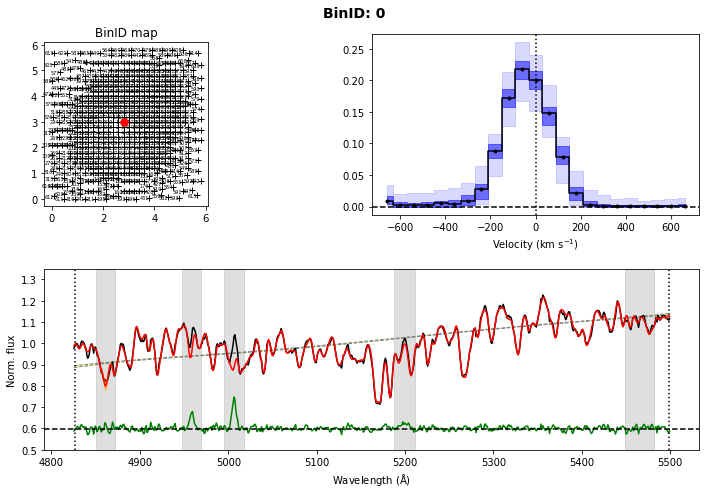



[ DONE ] NGC0000-RW - Bin: 0



In [1]:
run bayes_losvd_inspect_fits.py -r NGC0000-RW -b 0

## STEP 5: Load results into dictionary

In [2]:
from bayes_losvd_load_hdf5 import load_hdf5
tab = load_hdf5("../results/NGC0000-RW/NGC0000-RW_results.hdf5")



[ RUNNING ] Loading ../results/NGC0000-RW/NGC0000-RW_results.hdf5 data

# Opening file

# Loading input data:
 - binID
 - bin_flux
 - bin_snr
 - flux
 - lmax
 - lmin
 - lwave_temp
 - mask
 - mean_template
 - nbins
 - ndim
 - nmask
 - npix
 - npix_obs
 - npix_temp
 - nspec
 - ntemp
 - nvel
 - porder
 - sigma_obs
 - snr
 - spec_obs
 - templates
 - velscale
 - wave
 - wave_obs
 - x
 - xbin
 - xvel
 - y
 - ybin

# Loading Stan results:
 - [0] bestfit
 - [0] coefs
 - [0] conv_spec
 - [0] log_likelihood
 - [0] losvd
 - [0] poly
 - [0] sigma
 - [0] spec
 - [0] spec_pred
 - [0] weights


[ DONE ] 



## STEP 6: Run a GH fit to output LOSVD (optional)

| Flag | Alt. flag       | Description                                  | Options and default values |
|------|-----------------|----------------------------------------------|----------------------------|
| -r   | --runname       | path to results file from bayes-losvd_run.py | No default                 |
| -i   | --niter         | number of iterationsto run in Stan           |    1000       |
| -c   | --nchain        | number of simultaneous chains to run in Stan |  1      |    
| -b   | --bin           | bin IDs for spectra run                      |  all/odd/even/bin_list (comma separated bin list)      |    
| -n   | --njobs         | number of jobs (spectra) to run in parallel  |   1     |    
| -v   | --verbose       | printing Stan summary for each fit           | 0=False or 1=True, Default: 0       |    
| -s   | --save_chains   | save chain results for each fit              | 0=False or 1=True, Default: 0       |    
| -p   | --save_plots    | save diagnostic plots                        | 0=False or 1=True, Default: 0      |    
| -a   | --adapt_delta   | Stan Adapt_delta                             |  0.99      |    
| -d   | --max_treedepth | Stan maximum tree depth                      | 15 |   



In [3]:
run bayes_losvd_ghfit.py -r NGC0000-RW -b 0 -v 1

               BAYES-LOSVD                 
                (gh_fit)                   

# Selected bins: 0


[ RUNNING ] NGC0000-RW - Bin: 0

Using cached StanModel for stan_model/bayes-losvd_ghfit.stan

# Saving Stan summary: ../results/NGC0000-RW/NGC0000-RW_gh_Stan_summary_bin0.txt

Inference for Stan model: anon_model_1f94edff9e5ca9a826a84d3a2ce3f553.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

                   mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
offset           1.1e-3  3.7e-5 5.3e-4 1.1e-4 7.6e-4 1.1e-3 1.5e-3 2.1e-3    204    1.0
gamma             55.73    0.17   2.38  51.03   54.3  55.66   57.1   60.7    202   1.02
vel              -37.95     0.2   5.07 -47.82 -41.69  -37.7 -34.32  -28.5    613    1.0
vdisp            103.01    0.27   4.44  94.34 100.22 102.92 105.97 111.43    280   1.01
h3              -2.9e-3  1.2e-3   0.02  -0.05  -0.02-3.3e-3   0.02   0.04    433    1.0

## STEP 7: Inspect GH fit results (optional)

| Flag | Alt. flag      | Description                    | Options and default values  |
|------|----------------|--------------------------------|-----------------------------|
| -r   | --run          | run name with results          | No default                  |
| -b   | --binID        | bin ID of the spectrum to plot | 0                           |
| -l   | --losvd        | path to a LOSVD to add to plot | None                        |
| -s   | --save         | save figure in results dir     | 0=False, 1=True, Default= 0 |
| -n   | --norm         | nomalise LOSVD                 | 1                           |
| -d   | --dir          | path to directory with results | ../results                  |


               BAYES-LOSVD                 
            (inspect_ghfits)               


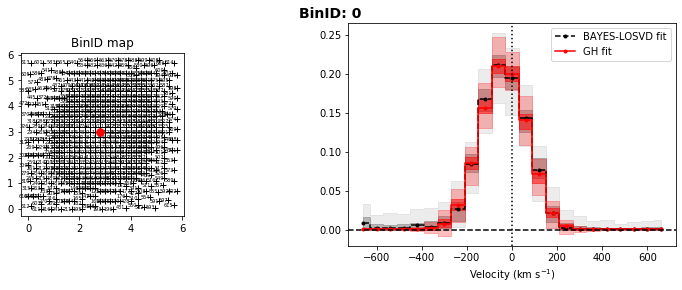



[ DONE ] NGC0000-RW - Bin: 0



In [1]:
run bayes_losvd_inspect_ghfit.py -r NGC0000-RW -b 0

## STEP 5: Load results into dictionary

In [2]:
from bayes_losvd_load_hdf5 import load_hdf5
tab = load_hdf5("../results/NGC0000-RW/NGC0000-RW_gh_results.hdf5")



[ RUNNING ] Loading ../results/NGC0000-RW/NGC0000-RW_gh_results.hdf5 data

# Opening file

# Loading input data:
 - binID
 - bin_flux
 - bin_snr
 - flux
 - lmax
 - lmin
 - lwave_temp
 - mask
 - mean_template
 - nbins
 - ndim
 - nmask
 - npix
 - npix_obs
 - npix_temp
 - nspec
 - ntemp
 - nvel
 - porder
 - sigma_obs
 - snr
 - spec_obs
 - templates
 - velscale
 - wave
 - wave_obs
 - x
 - xbin
 - xvel
 - y
 - ybin

# Loading Stan results:
 - [0] bestfit
 - [0] coefs
 - [0] conv_spec
 - [0] gamma
 - [0] h3
 - [0] h4
 - [0] log_likelihood
 - [0] losvd
 - [0] losvd_gh_mod
 - [0] offset
 - [0] poly
 - [0] sigma
 - [0] spec
 - [0] spec_pred
 - [0] vdisp
 - [0] vel
 - [0] weights


[ DONE ] 

